In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score
from math import sqrt

In [42]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.utils.validation import check_array
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as mae

In [4]:
train = pd.read_csv('df_train_copy')

In [5]:
train = train[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established']]

rf_xgb = train_copy = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [6]:
rf_xgb.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34


In [7]:
le = LabelEncoder()
to_encode = ['Outlet_Size','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type' ]
for i in to_encode:
    rf_xgb[i] =le.fit_transform(rf_xgb[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)

{'High': 0, 'Medium': 1, 'Small': 2}
{'Low Fat': 0, 'Regular': 1}
{'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}
{0: 0, 1: 1, 2: 2}
{'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
{'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


In [8]:
rf_xgb.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,22
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,12
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,22
3,19.20,1,0.066132,6,182.0950,1,2,0,732.3800,23
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052,34


In [9]:
X =  rf_xgb.loc[:, rf_xgb.columns != 'Item_Outlet_Sales']
y =  rf_xgb.loc[:, rf_xgb.columns == 'Item_Outlet_Sales']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=22)

In [11]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [12]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
xgb_pred = model.predict(X_val)

In [14]:
xgb_pred

array([1399.0134, 2086.8774, 3521.0215, ..., 5593.5415, 4522.881 ,
       5713.92  ], dtype=float32)

In [15]:
y_val2 = np.array(y_val).flatten()

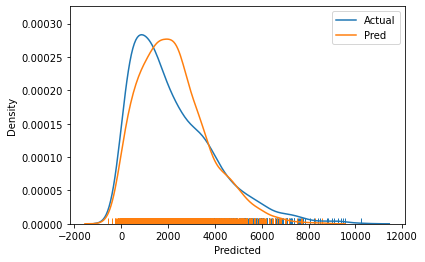

In [16]:
df = pd.DataFrame({'Actual': y_val2, 'Predicted': xgb_pred})

sns.distplot(df['Actual'], hist=False, rug=True, label = 'Actual')
sns.distplot(df['Predicted'], hist=False, rug=True, label = 'Pred')
plt.legend()
plt.show()

In [17]:
#this performs pretty well !

In [18]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_val, y_val, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 919.416 (70.181)


In [19]:
rmse = np.sqrt(MSE(y_val2, xgb_pred))
print("RMSE : % f" %(rmse))

RMSE :  1276.192480


### Hyper-parameter tuning

In [20]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

In [69]:
dtrain

In [21]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [22]:
#let's consider MAE as the evaluation metric

params['eval_metric'] = "mae"

In [23]:
num_boost_round = 999

In [24]:
model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:1573.78284
[1]	Test-mae:1194.75244
[2]	Test-mae:991.40985
[3]	Test-mae:888.62402
[4]	Test-mae:840.32593
[5]	Test-mae:820.16187
[6]	Test-mae:812.24512
[7]	Test-mae:810.63696
[8]	Test-mae:809.45111
[9]	Test-mae:809.51581
[10]	Test-mae:809.92902
[11]	Test-mae:811.96869
[12]	Test-mae:814.38495
[13]	Test-mae:814.57696
[14]	Test-mae:814.20020
[15]	Test-mae:813.34619
[16]	Test-mae:814.05542
[17]	Test-mae:814.45233
[18]	Test-mae:815.09137


best MAE is observed at the 9th cycle

In [25]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,1537.114819,5.911544,1538.295508,22.832430
1,1143.527783,3.882864,1148.806494,18.173387
2,925.127283,2.026844,936.613220,14.383318
3,811.672205,1.225270,829.800964,14.065078
4,754.564770,1.683256,780.031006,14.638157
5,725.032862,1.534621,756.957727,14.071946
6,709.453503,2.201530,748.769397,14.086069
7,699.579480,2.841647,745.854761,11.272770


In [26]:
# let's try to reduce the test mae mean

cv_results['test-mae-mean'].min()

745.8547608000001

In [27]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [28]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 767.8479860000001 for 7 rounds
CV with max_depth=9, min_child_weight=6

In [29]:
# best parameters max depth : 9, min_child_weight : 6

params['max_depth'] = 9
params['min_child_weight'] = 6

In [30]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [31]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[21:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 763.8394776 for 7 rounds
CV with subsample=1.0, colsample=0.9
[21:53:59] 

In [32]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [33]:
#tune learning rate : lesser rate is better, but makes the model to overfit, increases processing time

%time

# This can take some time…
min_mae = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # We update our parameters
    params['eta'] = eta
    
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
        
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
[21:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 420 ms
	MAE 763.8394776 for 7 rounds

CV with eta=0.2
[21:54:05] WARNING

In [34]:
params['eta'] = .01

In [35]:
params

{'max_depth': 9,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [36]:
#let's train with tuned parameters

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[21:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:2193.76221
[1]	Test-mae:2172.10742
[2]	Test-mae:2150.65796
[3]	Test-mae:2129.38281
[4]	Test-mae:2108.34155
[5]	Test-mae:2087.52368
[6]	Test-mae:2066.94702
[7]	Test-mae:2046.50464
[8]	Test-mae:2026.33142
[9]	Test-mae:2006.35596
[10]	Test-mae:1986.64221
[11]	Test-mae:1967.14270
[12]	Test-mae:1947.92590
[13]	Test-mae:1928.91553
[14]	Test-mae:1910.21875
[15]	Test-mae:1891.76440
[16]	Test-mae:1873.51148
[17]	Test-mae:1855.33862
[18]	Test-mae:1837.59021
[19]	Test-mae:1820.01672
[20]	Test-mae:1802.69592
[21]	Test-mae:1785.58154
[22]	Test-mae:1768.80542
[23]	Test-mae:1752.17725
[24]	Test-mae:1735.78223
[25]	Test-mae:1719.61938
[26]	Test-mae:1703.77234
[27]	Test-mae:1688.02551
[28]	Test-mae:1672.40186
[29]	Test-mae:1657.08960
[30]	Test-mae:1641.97217
[31]	Test-mae:1627.22217
[32]	Test-mae:1612.52417
[33]	Tes

In [37]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 817.30 in 294 rounds


In [38]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[21:56:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:2193.76221
[1]	Test-mae:2172.10742
[2]	Test-mae:2150.65796
[3]	Test-mae:2129.38281
[4]	Test-mae:2108.34155
[5]	Test-mae:2087.52368
[6]	Test-mae:2066.94702
[7]	Test-mae:2046.50464
[8]	Test-mae:2026.33142
[9]	Test-mae:2006.35596
[10]	Test-mae:1986.64221
[11]	Test-mae:1967.14270
[12]	Test-mae:1947.92590
[13]	Test-mae:1928.91553
[14]	Test-mae:1910.21875
[15]	Test-mae:1891.76440
[16]	Test-mae:1873.51148
[17]	Test-mae:1855.33862
[18]	Test-mae:1837.59021
[19]	Test-mae:1820.01672
[20]	Test-mae:1802.69592
[21]	Test-mae:1785.58154
[22]	Test-mae:1768.80542
[23]	Test-mae:1752.17725
[24]	Test-mae:1735.78223
[25]	Test-mae:1719.61938
[26]	Test-mae:1703.77234
[27]	Test-mae:1688.02551
[28]	Test-mae:1672.40186
[29]	Test-mae:1657.08960
[30]	Test-mae:1641.97217
[31]	Test-mae:1627.22217
[32]	Test-mae:1612.52417
[33]	Tes

In [43]:
mae(best_model.predict(dtest), y_val)

817.3035616344606

In [49]:
y_best_pred = best_model.predict(dtest)

In [44]:
best_model.save_model("my_model.model")

In [53]:
y_val3 = np.array(y_val).flatten()

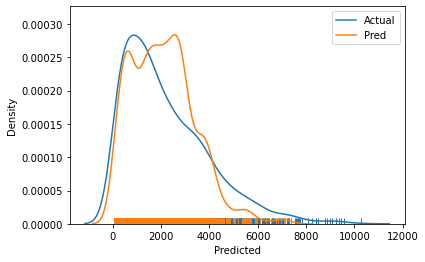

In [54]:
df = pd.DataFrame({'Actual': y_val3, 'Predicted': y_best_pred })

sns.distplot(df['Actual'], hist=False, rug=True, label = 'Actual')
sns.distplot(df['Predicted'], hist=False, rug=True, label = 'Pred')
plt.legend()
plt.show()

In [45]:
#let's do the predictions for the test set

In [55]:
test_bm_sales = pd.read_csv('test_bm_sales.csv')

In [58]:
test_bm_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [57]:
test_bm = test_bm_sales.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [59]:
test_bm.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3


In [61]:
le = LabelEncoder()
to_encode = ['Outlet_Size','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type' ]
for i in to_encode:
    test_bm[i] =le.fit_transform(test_bm[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)

{'High': 0, 'Medium': 1, 'Small': 2, nan: 3}
{'LF': 0, 'Low Fat': 1, 'Regular': 2, 'low fat': 3, 'reg': 4}
{'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}
{0: 0, 1: 1, 2: 2, 3: 3}
{'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
{'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


In [62]:
test_bm.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1,0,1
1,8.300,4,0.038428,4,87.3198,3,1,1
2,14.600,1,0.099575,11,241.7538,3,2,0
3,7.315,1,0.015388,13,155.0340,3,1,1
4,NaN,2,0.118599,4,234.2300,1,2,3


In [65]:
params

{'max_depth': 9,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [67]:
xgtest = xgb.DMatrix(test_bm.values)

In [70]:
model = XGBRegressor(params)